In [1]:
#primary packages for analysis and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#packages for ML aspects
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

# packages for reporting
from scipy import stats
from scipy.stats import randint
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

#display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import os
os.getcwd()

'C:\\Users\\WiensJ01\\Documents\\Python Scripts'

In [3]:
df = pd.read_csv("2019_CUSA_Offense_pbp_detail.csv")
df = df[df.down != 0]
df.head()

,Unnamed: 0,offense_play,defense_play,half,period,score_diff,yards_to_goal,new_series,down,distance,sec_remain,under_two,yards_gained,EPA,ep_before,ep_after,wpa,wp_before,wp_after,success,epa_success,play_type,play_call,rush,pass,pass_attempt,completion,target,offense_conference,defense_conference,position_reception,position_target,position_fumble,position_rush,position_pass_breakup,rush_player,rush_yds,reception_player,reception_yds,target_player,fumble_player
0,1,Louisiana Tech,Texas,1,1,-7,77,0,1,10,769,False,3,-0.385234,0.256258,-0.128976,-0.010664,0.249769,0.239105,0,0.0,Rush,Rush,1,0,0,0,0,Conference USA,Big 12,NaN,NaN,NaN,RB,NaN,Israel Tucker,3.0,NaN,NaN,NaN,NaN
1,2,Louisiana Tech,Texas,1,1,-7,74,0,2,7,765,False,8,1.453910,-0.128976,1.324935,0.046144,0.239105,0.285249,1,1.0,Pass Reception,Pass,0,1,1,1,1,Conference USA,Big 12,WR,WR,NaN,NaN,NaN,NaN,NaN,Griffin Hebert,8.0,NaN,NaN
2,3,Louisiana Tech,Texas,1,1,-7,66,1,1,10,690,False,6,0.323597,1.324935,1.648532,0.009821,0.285249,0.295070,1,1.0,Rush,Rush,1,0,0,0,0,Conference USA,Big 12,NaN,NaN,NaN,RB,NaN,Israel Tucker,6.0,NaN,NaN,NaN,NaN
3,4,Louisiana Tech,Texas,1,1,-7,60,0,2,4,675,False,18,1.607800,1.648532,3.256332,0.050145,0.295070,0.345215,1,1.0,Pass Reception,Pass,0,1,1,1,1,Conference USA,Big 12,WR,WR,NaN,NaN,NaN,NaN,NaN,Griffin Hebert,18.0,NaN,NaN
4,5,Louisiana Tech,Texas,1,1,-7,42,1,1,10,613,False,-2,-1.034136,3.256332,2.222195,-0.040233,0.345215,0.304982,0,0.0,Rush,Rush,1,0,0,0,0,Conference USA,Big 12,NaN,NaN,NaN,RB,NaN,Israel Tucker,-2.0,NaN,NaN,NaN,NaN


In [4]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [5]:
df_cha = df.loc[df["offense_play"] == "Charlotte"]
df_cha.head()

,offense_play,defense_play,half,period,score_diff,yards_to_goal,new_series,down,distance,sec_remain,under_two,yards_gained,EPA,ep_before,ep_after,wpa,wp_before,wp_after,success,epa_success,play_type,play_call,rush,pass,pass_attempt,completion,target,offense_conference,defense_conference,position_reception,position_target,position_fumble,position_rush,position_pass_breakup,rush_player,rush_yds,reception_player,reception_yds,target_player,fumble_player
890,Charlotte,Buffalo,1,1,0,75,0,1,10,915,False,5,0.066878,0.833168,0.900046,0.002647,0.490320,0.492967,1,1.0,Rush,Rush,1,0,0,0,0,Conference USA,Mid-American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,Charlotte,Buffalo,1,1,0,70,0,2,5,915,False,4,0.528962,0.900046,1.429008,0.020865,0.492967,0.513832,1,1.0,Rush,Rush,1,0,0,0,0,Conference USA,Mid-American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,Charlotte,Buffalo,1,1,0,76,0,3,11,915,False,2,-0.993932,-1.384896,-2.378828,-0.037789,0.402904,0.365115,0,0.0,Rush,Rush,1,0,0,0,0,Conference USA,Mid-American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,Charlotte,Buffalo,1,1,-7,75,0,1,10,567,False,29,2.448412,0.554610,3.003023,0.079897,0.251456,0.331352,1,1.0,Pass Reception,Pass,0,1,1,1,1,Conference USA,Mid-American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,Charlotte,Buffalo,1,1,-7,46,1,1,10,567,False,3,-0.342579,3.003023,2.660444,-0.012058,0.331352,0.319294,0,0.0,Rush,Rush,1,0,0,0,0,Conference USA,Mid-American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_cha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 890 to 11078
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   offense_play           851 non-null    object 
 1   defense_play           851 non-null    object 
 2   half                   851 non-null    int64  
 3   period                 851 non-null    int64  
 4   score_diff             851 non-null    int64  
 5   yards_to_goal          851 non-null    int64  
 6   new_series             851 non-null    int64  
 7   down                   851 non-null    int64  
 8   distance               851 non-null    int64  
 9   sec_remain             851 non-null    int64  
 10  under_two              851 non-null    bool   
 11  yards_gained           851 non-null    int64  
 12  EPA                    851 non-null    float64
 13  ep_before              851 non-null    float64
 14  ep_after               851 non-null    float64
 15  wp

In [7]:
df_cha.isna().sum()

offense_play               0
defense_play               0
half                       0
period                     0
score_diff                 0
yards_to_goal              0
new_series                 0
down                       0
distance                   0
sec_remain                 0
under_two                  0
yards_gained               0
EPA                        0
ep_before                  0
ep_after                   0
wpa                        5
wp_before                  0
wp_after                   5
success                    0
epa_success                0
play_type                  0
play_call                  0
rush                       0
pass                       0
pass_attempt               0
completion                 0
target                     0
offense_conference         0
defense_conference        74
position_reception       671
position_target          593
position_fumble          843
position_rush            380
position_pass_breakup    835
rush_player   

# 1. Exploratory Analysis

In [9]:
df_cha.groupby('down')['play_call'].value_counts() 

down  play_call
1     Rush         267
      Pass         122
2     Rush         147
      Pass         132
3     Rush          83
      Pass          76
4     Rush          13
      Pass          11
Name: play_call, dtype: int64

Text(0, 0.5, 'Occurrences')

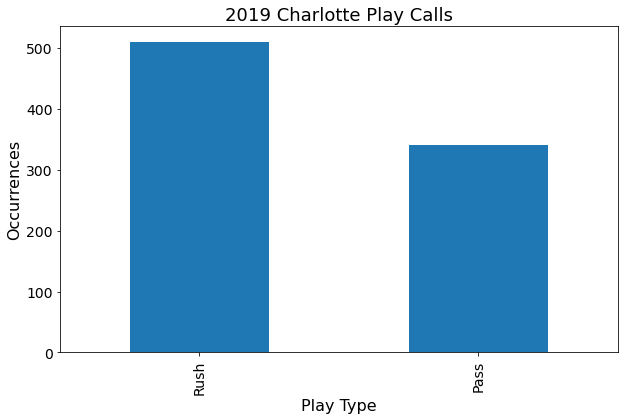

In [10]:
# Plot Run/Pass Totals 

fig1=df_cha['play_call'].value_counts().plot(kind='bar', figsize = (10,6), fontsize=14)
plt.title('2019 Charlotte Play Calls', fontsize = 18)
plt.xlabel('Play Type',fontsize =16)
plt.ylabel('Occurrences', fontsize = 16)

Text(0.5, 1.0, '2019 Charlotte Play Calls by Down')

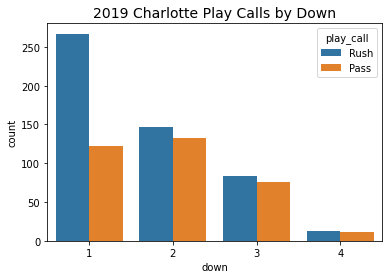

In [11]:
# Run/Pass Totals by Down

ax = sns.countplot(x="down", hue="play_call", data=df_cha)

plt.title('2019 Charlotte Play Calls by Down', fontsize = 14)

In [12]:
# Function for placing distance category into yards-to-go intervals

def ydstogo_grouping(row):
    if row['distance'] in range(7,11):
        val = 3
    elif row['distance'] in range(4,7):
        val = 2
    elif row['distance'] in range(1,4):
        val = 1
    elif (row['distance'] > 10) & (row['distance'] < 20):
        val = 4 
    else:
        val = 5
    
    return val

In [13]:
# Apply function on dataframe

df_cha['yds_to_go_grp'] = df.apply(ydstogo_grouping, axis=1)

<ipython-input-13-43577213869d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cha['yds_to_go_grp'] = df.apply(ydstogo_grouping, axis=1)


Text(0.4, 0.45, 'Example for x-axis (2,3) represents 2nd down and yrd group 3,\n meaning 7-10 yards to go')

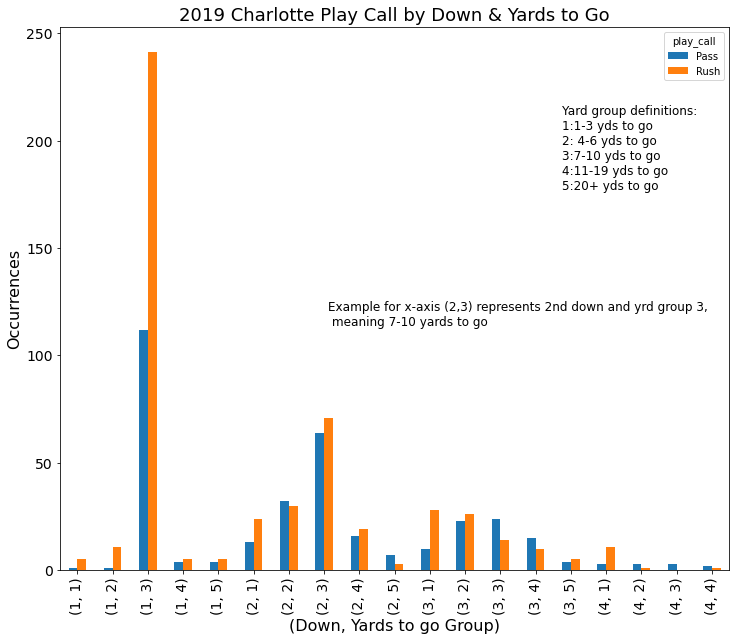

In [14]:
# Plotting play calls by down and distance intervals

ax = df_cha.groupby(['down','yds_to_go_grp'])['play_call'].value_counts().unstack(level=-1).plot(kind='bar',figsize=(12,10),fontsize= 14, rot = 90)
plt.xlabel('(Down, Yards to go Group)', fontsize=16)
plt.ylabel('Occurrences', fontsize = 16)
plt.title('2019 Charlotte Play Call by Down & Yards to Go', fontsize = 18)
plt.text(0.75,0.7,'Yard group definitions: \n1:1-3 yds to go\n2: 4-6 yds to go\n3:7-10 yds to go\n4:11-19 yds to go\n5:20+ yds to go',size = 12,transform=ax.transAxes)
plt.text(0.4,0.45,'Example for x-axis (2,3) represents 2nd down and yrd group 3,\n meaning 7-10 yards to go',size = 12,transform=ax.transAxes)

In [15]:
# place results into better table

yards_to_go_df = df_cha.groupby(['down','yds_to_go_grp'])['play_call'].value_counts().unstack(level=-1)
yards_to_go_df['pass_call_percent'] = yards_to_go_df['Pass']/(yards_to_go_df['Pass']+yards_to_go_df['Rush'])
yards_to_go_df['run_call_percent'] = yards_to_go_df['Rush']/(yards_to_go_df['Pass']+yards_to_go_df['Rush'])

yards_to_go_df = yards_to_go_df.reset_index()
yards_to_go_df.columns.name = None
yards_to_go_df['yards_to_go']=yards_to_go_df['yds_to_go_grp'].apply(lambda x:'1-3' if x == 1 else('4-6' if x == 2 else('7-10' if x == 3 else('11-19' if x ==4 else '20+'))))

table_df =yards_to_go_df[['down','yards_to_go','pass_call_percent','run_call_percent']]
table_df=yards_to_go_df.set_index(['down','yards_to_go'])

format_dict = {'pass_call_percent': '{:.2%}','run_call_percent': '{:.2%}'}

table_df[['pass_call_percent','run_call_percent']].style.format(format_dict)

In [16]:
yards_to_go_df.head()

,down,yds_to_go_grp,Pass,Rush,pass_call_percent,run_call_percent,yards_to_go
0,1,1,1.0,5.0,0.166667,0.833333,1-3
1,1,2,1.0,11.0,0.083333,0.916667,4-6
2,1,3,112.0,241.0,0.317280,0.682720,7-10
3,1,4,4.0,5.0,0.444444,0.555556,11-19
4,1,5,4.0,5.0,0.444444,0.555556,20+


# 2. Data Preprocessing

In [17]:
df_cha1 = df_cha[['score_diff','yards_to_goal','sec_remain','down','distance','under_two','wp_before','pass']]
df_cha1.head()

,score_diff,yards_to_goal,sec_remain,down,distance,under_two,wp_before,pass
890,0,75,915,1,10,False,0.490320,0
891,0,70,915,2,5,False,0.492967,0
892,0,76,915,3,11,False,0.402904,0
893,-7,75,567,1,10,False,0.251456,1
894,-7,46,567,1,10,False,0.331352,0


In [18]:
# convert to integer
df_cha1['under_two'] = df_cha1['under_two'].astype(int)

<ipython-input-18-33f26996b744>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cha1['under_two'] = df_cha1['under_two'].astype(int)


In [19]:
df_cha1.head()

,score_diff,yards_to_goal,sec_remain,down,distance,under_two,wp_before,pass
890,0,75,915,1,10,0,0.490320,0
891,0,70,915,2,5,0,0.492967,0
892,0,76,915,3,11,0,0.402904,0
893,-7,75,567,1,10,0,0.251456,1
894,-7,46,567,1,10,0,0.331352,0


In [27]:
df_cha1.isna().sum()

score_diff       0
yards_to_goal    0
sec_remain       0
down             0
distance         0
under_two        0
wp_before        0
pass             0
dtype: int64

In [28]:
df_cha1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 890 to 11078
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score_diff     851 non-null    int64  
 1   yards_to_goal  851 non-null    int64  
 2   sec_remain     851 non-null    int64  
 3   down           851 non-null    int64  
 4   distance       851 non-null    int64  
 5   under_two      851 non-null    int32  
 6   wp_before      851 non-null    float64
 7   pass           851 non-null    int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 96.5 KB


In [29]:
# Select Features
features = df_cha1[['score_diff','yards_to_goal','sec_remain','down','distance','under_two','wp_before']]


In [30]:
df_cha1.feature_names = features.columns 

In [31]:
df_cha1.target = df_cha1['pass']

# 3. Model Prep

In [32]:
train_df, validation_df, test_df = np.split(df_cha1.sample(frac=1), [int(0.7 * len(df_cha1)), int(0.9 * len(df_cha1))])


print("Training size is %d, validation size is %d, test size is %d" % (len(train_df),
                                                                           len(validation_df),
                                                                           len(test_df)))

Training size is 595, validation size is 170, test size is 86


In [33]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Select Features for transformation:
standardize_and_impute_only = [
'sec_remain'
, 'score_diff'
]


discretization = [
 'down'
, 'distance'
, 'yards_to_goal'
, 'under_two'
, 'wp_before'
]

In [34]:
# Construct Transformers
standard_scaler = StandardScaler()
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')


# Make pipelines
standardize_and_impute_pipeline_steps = [('standardization', standard_scaler)]
standardize_and_impute_pipeline = Pipeline(standardize_and_impute_pipeline_steps)


discretize_steps = [('discretize', discretizer)]
discretize_pipeline = Pipeline(discretize_steps)

In [35]:
# Combine Transformers and pipelines

transform_pipeline = ColumnTransformer([
    ('standardize_and_impute_pipeline', standardize_and_impute_pipeline, standardize_and_impute_only)
     , ('discretize_pipeline', discretize_pipeline, discretization)
    
])

# 4. Run Model

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, accuracy_score

#small_df = train_df

X = train_df.drop(['pass'], axis = 1)
y = train_df[['pass']]

from sklearn import ensemble

gbc = GradientBoostingClassifier(n_estimators=100
                                , learning_rate=1.0
                                , max_depth=1
                                , random_state=101)


pipeline1 = Pipeline([('transform1', transform_pipeline),('gbc', gbc)])

In [37]:
pipeline1.fit(X, y)

C:\Users\WiensJ01\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('transform1',
                 ColumnTransformer(transformers=[('standardize_and_impute_pipeline',
                                                  Pipeline(steps=[('standardization',
                                                                   StandardScaler())]),
                                                  ['sec_remain', 'score_diff']),
                                                 ('discretize_pipeline',
                                                  Pipeline(steps=[('discretize',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=8,
                                                                                    strategy='uniform'))]),
                                                  ['down', 'distance',
                                                   'yards_to_goal', 'under_two',
                   

In [38]:
# predicted probs for Gradient Boosting model 
pd.DataFrame(pipeline1.predict_proba(X)).sort_values([0])

,0,1
394,0.058112,0.941888
363,0.084356,0.915644
46,0.111664,0.888336
309,0.132342,0.867658
171,0.155068,0.844932
174,0.155068,0.844932
458,0.156794,0.843206
179,0.161369,0.838631
444,0.165772,0.834228
48,0.170870,0.829130


In [42]:
p=pd.DataFrame(pipeline1.predict(X))
p

,0
0,0
1,1
2,0
3,0
4,1
5,1
6,1
7,0
8,0
9,0


In [44]:
prob = pipeline1.predict_proba(X)[:,1]
prob

array([0.24614148, 0.74344103, 0.13277299, 0.15463381, 0.55670881,
       0.70659782, 0.54799199, 0.26040212, 0.46511089, 0.27166868,
       0.31695269, 0.09835284, 0.53523331, 0.2089937 , 0.39715542,
       0.35039529, 0.09125444, 0.09445426, 0.69645271, 0.16607182,
       0.66163605, 0.16108637, 0.23690429, 0.41123199, 0.20416044,
       0.21697331, 0.50235463, 0.41595729, 0.45181098, 0.41039307,
       0.3338706 , 0.12604187, 0.19269166, 0.50573602, 0.59479668,
       0.14372387, 0.46511089, 0.82122027, 0.5536874 , 0.45631598,
       0.54927885, 0.29068725, 0.41869138, 0.40853408, 0.78573905,
       0.24847392, 0.88833575, 0.3630277 , 0.82912963, 0.3576204 ,
       0.52497309, 0.42130458, 0.32144003, 0.21844946, 0.24556752,
       0.55007008, 0.44218027, 0.22015257, 0.70773363, 0.36634965,
       0.40529225, 0.35590118, 0.47692272, 0.30959602, 0.45498035,
       0.35533583, 0.6275229 , 0.42857711, 0.16607182, 0.61127783,
       0.11082608, 0.43833857, 0.37248095, 0.11797338, 0.39109

# 5. Model Evaluation

In [45]:
# Compute ROC curve for the Gradient Boosting Classifier
from sklearn.metrics import roc_curve, auc

gbc_y_score = pipeline1.predict_proba(X)[:,1]
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y, gbc_y_score)

roc_auc = auc(gbc_fpr,gbc_tpr)
print(' ROC AUC =%.2f'%roc_auc)

 ROC AUC =0.78


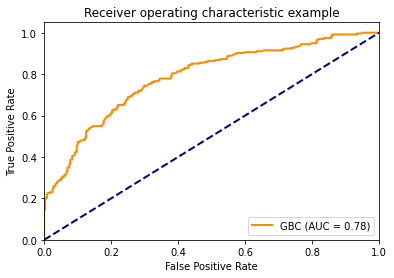

In [46]:
# Plotting the Gradient Boosting Classifier AUC

gbc_roc_auc = auc(gbc_fpr,gbc_tpr)

plt.figure()
lw = 2
plt.plot(gbc_fpr,gbc_tpr, color='darkorange',
         lw=lw, label='GBC (AUC = %0.2f)' % gbc_roc_auc)


plt.plot()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.metrics import classification_report, accuracy_score, auc,roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

print(accuracy_score(y, p))
print(classification_report(y, p))

#fpr, tpr, thresholds = roc_curve(y, p)
print(auc(gbc_fpr, gbc_tpr))

0.7361344537815127
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       360
           1       0.73      0.52      0.61       235

    accuracy                           0.74       595
   macro avg       0.73      0.70      0.71       595
weighted avg       0.74      0.74      0.73       595

0.7840661938534279


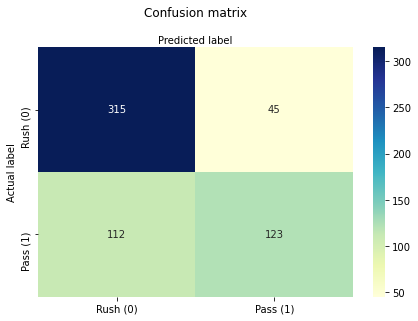

In [48]:
cnf_matrix = metrics.confusion_matrix(y, p)
class_names=['Rush (0)','Pass (1)'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,
    yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("Confusion_matrix.jpg", dpi=100)

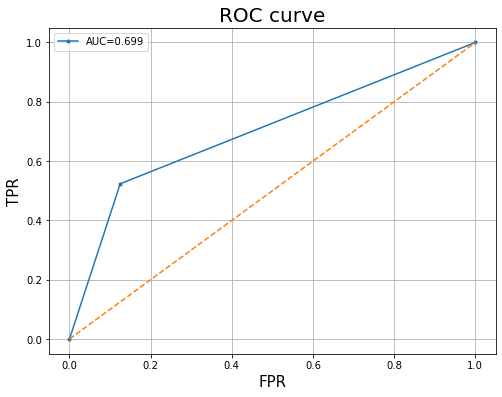

In [49]:
# ROC for predicting outcomes, not probabilities

%matplotlib inline
fpr, tpr, thresholds = roc_curve(y, p)
auc = metrics.roc_auc_score(y, p)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
#plt.show()
plt.savefig("Roc_curve.jpg", dpi=100)

<AxesSubplot:>

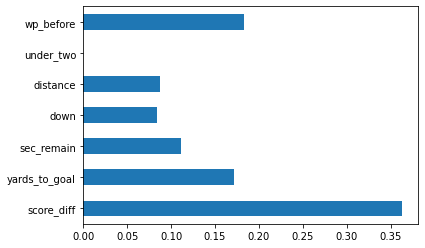

In [50]:
feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

Text(0.5, 0, 'GBC Feature Importance')

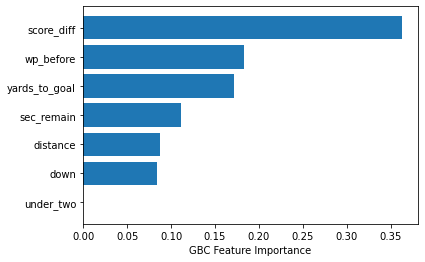

In [51]:
sorted_idx = gbc.feature_importances_.argsort()
plt.barh(df_cha1.feature_names[sorted_idx], gbc.feature_importances_[sorted_idx])
plt.xlabel("GBC Feature Importance")

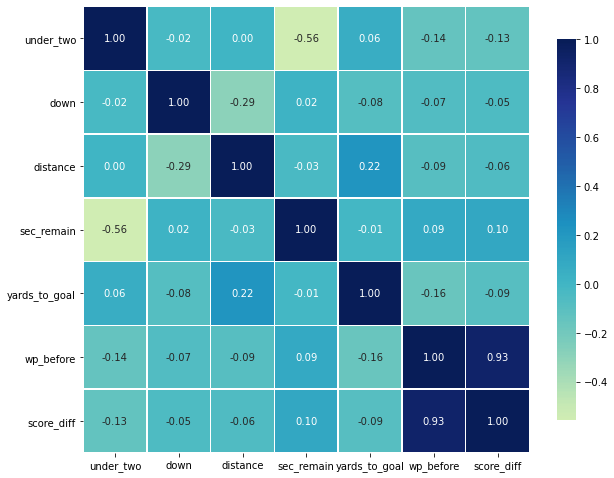

In [52]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X[df_cha1.feature_names[sorted_idx]])

In [53]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(gbc, X, y)

Text(0.5, 0, 'Permutation Importance')

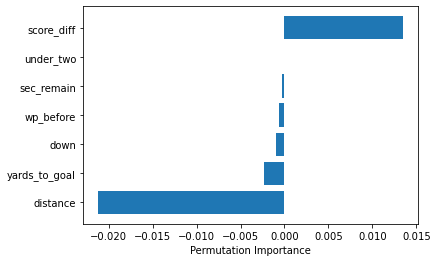

In [54]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df_cha1.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [115]:
p=pd.DataFrame(pipeline1.predict(X))
p

,0
0,0
1,0
2,0
3,0
4,1
5,1
6,0
7,0
8,0
9,1


In [64]:
df_cha1_pred = df_cha[['score_diff','yards_to_goal','sec_remain','down','distance','under_two','wp_before','pass']]
df_cha1_pred['under_two'] = df_cha1_pred['under_two'].astype(int)
df_cha1.reset_index(level=0,inplace=True)
df_cha1_pred.head()

<ipython-input-64-0e6c50991144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cha1_pred['under_two'] = df_cha1_pred['under_two'].astype(int)


,score_diff,yards_to_goal,sec_remain,down,distance,under_two,wp_before,pass
890,0,75,915,1,10,0,0.490320,0
891,0,70,915,2,5,0,0.492967,0
892,0,76,915,3,11,0,0.402904,0
893,-7,75,567,1,10,0,0.251456,1
894,-7,46,567,1,10,0,0.331352,0


In [59]:
pred = pd.DataFrame(pipeline1.predict_proba(df_cha1_pred))
pred

C:\Users\WiensJ01\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


,0,1
0,0.833928,0.166072
1,0.602845,0.397155
2,0.607872,0.392128
3,0.598454,0.401546
4,0.559249,0.440751
5,0.369047,0.630953
6,0.548189,0.451811
7,0.636399,0.363601
8,0.457398,0.542602
9,0.244114,0.755886


In [67]:
df_cha1_pred = df_cha1.copy()
df_cha1_pred.head()

,index,score_diff,yards_to_goal,sec_remain,down,distance,under_two,wp_before,pass
0,890,0,75,915,1,10,0,0.490320,0
1,891,0,70,915,2,5,0,0.492967,0
2,892,0,76,915,3,11,0,0.402904,0
3,893,-7,75,567,1,10,0,0.251456,1
4,894,-7,46,567,1,10,0,0.331352,0


In [68]:
df_cha1_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          851 non-null    int64  
 1   score_diff     851 non-null    int64  
 2   yards_to_goal  851 non-null    int64  
 3   sec_remain     851 non-null    int64  
 4   down           851 non-null    int64  
 5   distance       851 non-null    int64  
 6   under_two      851 non-null    int32  
 7   wp_before      851 non-null    float64
 8   pass           851 non-null    int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 56.6 KB


In [73]:
df_all = df_cha1_pred.merge(pd.DataFrame(pipeline1.predict_proba(df_cha1_pred)), left_index=True,right_index=True)

C:\Users\WiensJ01\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [77]:

df_all.shape

(851, 11)

In [ ]:
df_all.columns.values[9] = "rush_predict"
df_all.columns.values[10] = "pass_predict"


df_all

In [92]:
mapping = {df_all.columns[9]: 'rush_predict', df_all.columns[10]: 'pass_predict'}
df_all1 = df_all.rename(columns=mapping)

df_all1

,index,score_diff,yards_to_goal,sec_remain,down,distance,under_two,wp_before,pass,rush_predict,pass_predict
0,890,0,75,915,1,10,0,0.490320,0,0.833928,0.166072
1,891,0,70,915,2,5,0,0.492967,0,0.602845,0.397155
2,892,0,76,915,3,11,0,0.402904,0,0.607872,0.392128
3,893,-7,75,567,1,10,0,0.251456,1,0.598454,0.401546
4,894,-7,46,567,1,10,0,0.331352,0,0.559249,0.440751
5,895,-7,43,567,2,7,0,0.319294,0,0.369047,0.630953
6,896,-7,40,567,3,4,0,0.303674,0,0.548189,0.451811
7,897,-7,37,567,4,1,0,0.264188,0,0.636399,0.363601
8,898,-7,34,567,1,10,0,0.358726,1,0.457398,0.542602
9,899,-7,34,567,2,10,0,0.332904,1,0.244114,0.755886


In [93]:
df_all1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          851 non-null    int64  
 1   score_diff     851 non-null    int64  
 2   yards_to_goal  851 non-null    int64  
 3   sec_remain     851 non-null    int64  
 4   down           851 non-null    int64  
 5   distance       851 non-null    int64  
 6   under_two      851 non-null    int32  
 7   wp_before      851 non-null    float64
 8   pass           851 non-null    int64  
 9   rush_predict   851 non-null    float64
 10  pass_predict   851 non-null    float64
dtypes: float64(3), int32(1), int64(7)
memory usage: 69.9 KB


In [90]:
df_all1['rush_predict'] = df_all1['rush_predict'].astype(int)
df_all1['pass_predict'] = df_all1['pass_predict'].astype(int)

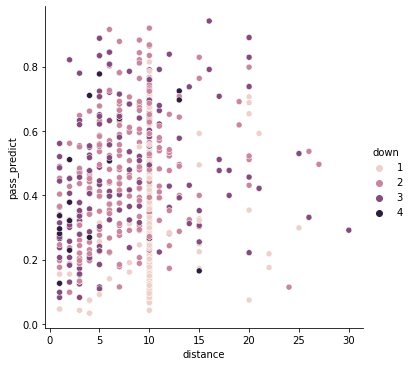

In [94]:
# (title = 'Predicted Dropback Probability by Down and Distance')
sns.relplot(data=df_all1, x="distance", y="pass_predict", hue="down")

In [99]:
df_cha1_pred2 = df_all1[df_all1.distance <= 15]
df_cha1_pred2['yards_to_go'] = df_cha1_pred2.apply(ydstogo_grouping, axis=1)
df_cha1_pred2 = df_cha1_pred2[df_cha1_pred2.down != 4]
df6 = df_cha1_pred2.groupby(['down','distance']).mean()
df6

<ipython-input-99-499cff799bd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cha1_pred2['yards_to_go'] = df_cha1_pred2.apply(ydstogo_grouping, axis=1)


index  score_diff  yards_to_goal  sec_remain  under_two  \
down distance                                                                  
1    1         2759.000000   10.666667       1.000000  255.666667   0.000000   
     2         8034.000000    0.000000       2.000000  549.000000   0.000000   
     3         5785.000000   12.500000       3.000000  466.000000   0.000000   
     4         7134.666667    1.000000       4.000000  910.000000   0.000000   
     5         5693.142857   -0.857143      26.285714  455.857143   0.142857   
     6         1873.000000  -14.500000       6.000000  436.000000   0.000000   
     8         5653.333333    0.000000       8.000000  465.333333   0.333333   
     9         6225.500000   10.500000       9.000000  832.500000   0.000000   
     10        5701.074713   -2.339080      56.747126  509.683908   0.135057   
     12        5444.000000  -11.000000      12.000000  336.000000   0.000000   
     15        3730.625000   -0.500000      57.750000  501.125000   0.125000   
2    1         4703.125000    1.250000      30.000000  485.250000   0.250000   
     2         5370.875000    6.500000      45.625000  638.750000   0.000000   
     3         6955.285714    4.000000      42.952381  397.190476   0.095238   
     4         4775.937500   -3.875000      40.187500  572.437500   0.062500   
     5         5309.826087    2.347826      55.000000  598.086957   0.043478   
     6         5190.478261   -0.652174      59.130435  574.956522   0.086957   
     7         5271.600000   -6.333333      58.133333  581.200000   0.033333   
     8         4588.461538    1.769231      46.307692  483.692308   0.000000   
     9         7158.000000   -4.968750      54.500000  592.281250   0.125000   
     10        5741.766667   -7.033333      56.583333  521.916667   0.083333   
     11        7386.800000   -4.700000      54.900000  582.900000   0.000000   
     12        4901.100000   -5.800000      59.500000  653.600000   0.100000   
     13        4693.142857   -1.000000      64.714286  546.285714   0.000000   
     14        3359.000000  -35.000000      65.000000  896.000000   0.000000   
     15        3805.400000    5.200000      51.400000  550.200000   0.000000   
3    1         6206.100000   -3.600000      51.000000  586.300000   0.100000   
     2         4964.900000    1.500000      48.700000  572.400000   0.100000   
     3         5454.055556    1.166667      42.333333  571.388889   0.000000   
     4         4819.937500   -4.437500      37.437500  635.125000   0.000000   
     5         6794.277778   -1.111111      55.166667  538.722222   0.111111   
     6         4893.400000   -6.533333      50.866667  639.666667   0.000000   
     7         4746.416667   -8.333333      47.416667  436.000000   0.166667   
     8         5461.222222   -3.000000      51.222222  450.000000   0.000000   
     9         9822.000000   -2.833333      52.166667  309.666667   0.500000   
     10        5371.000000   -3.090909      55.545455  462.545455   0.181818   
     11        4540.666667   -6.666667      58.500000  608.333333   0.000000   
     12        4577.000000   -4.250000      69.250000  607.750000   0.000000   
     13        7032.500000   -3.500000      69.500000  483.500000   0.500000   
     14        4562.000000  -19.666667      67.666667  739.666667   0.000000   
     15        8498.000000   -0.666667      69.666667  268.000000   0.000000   

               wp_before      pass  rush_predict  pass_predict  yards_to_go  
down distance                                                                
1    1          0.738304  0.333333      0.917830      0.082170          1.0  
     2          0.458648  0.000000      0.845031      0.154969          1.0  
     3          0.631458  0.000000      0.912728      0.087272          1.0  
     4          0.631018  0.000000      0.940526      0.059474          2.0  
     5          0.420124  0.142857      0.736299      0.263701          2.0  
     6          0.233373  0.000000

In [96]:
df6.reset_index()


,down,distance,index,score_diff,yards_to_goal,sec_remain,under_two,wp_before,pass,rush_predict,pass_predict
0,1,1,2759.000000,10.666667,1.000000,255.666667,0.000000,0.738304,0.333333,0.917830,0.082170
1,1,2,8034.000000,0.000000,2.000000,549.000000,0.000000,0.458648,0.000000,0.845031,0.154969
2,1,3,5785.000000,12.500000,3.000000,466.000000,0.000000,0.631458,0.000000,0.912728,0.087272
3,1,4,7134.666667,1.000000,4.000000,910.000000,0.000000,0.631018,0.000000,0.940526,0.059474
4,1,5,5693.142857,-0.857143,26.285714,455.857143,0.142857,0.420124,0.142857,0.736299,0.263701
5,1,6,1873.000000,-14.500000,6.000000,436.000000,0.000000,0.233373,0.000000,0.730542,0.269458
6,1,8,5653.333333,0.000000,8.000000,465.333333,0.333333,0.592888,0.333333,0.779240,0.220760
7,1,9,6225.500000,10.500000,9.000000,832.500000,0.000000,0.878133,0.000000,0.601993,0.398007
8,1,10,5701.074713,-2.339080,56.747126,509.683908,0.135057,0.454296,0.324713,0.674705,0.325295
9,1,12,5444.000000,-11.000000,12.000000,336.000000,0.000000,0.087323,0.000000,0.716228,0.283772


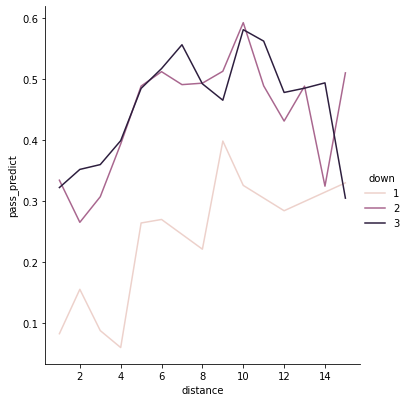

In [97]:
# title = 'Predicted Dropback Probability by Down and Distance')
g = sns.relplot(x='distance', y='pass_predict', hue='down',
                data=df6, kind='line',
               height=5.5, aspect=.9)

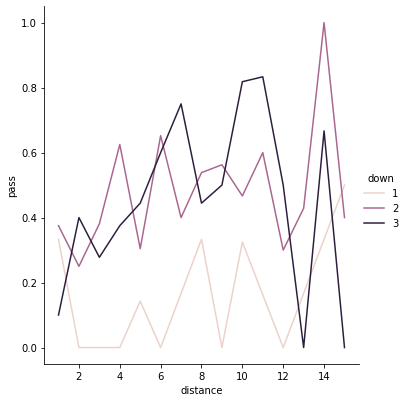

In [98]:
# title = 'Predicted Dropback Probability by Down and Distance')
g = sns.relplot(x='distance', y='pass', hue='down',
                data=df6, kind='line',
               height=5.5, aspect=.9)